# Analysing the kalimati data set from kalimati-tarkari-dataset
### link: https://opendatanepal.com/dataset/kalimati-tarkari-dataset
### kalimati-vegetable-market is a well known fruits and vegetables market of kathmandu

In [1]:
#Importing necessary libraries
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from difflib import get_close_matches 

In [2]:
#loading the kalimati data set
df = pd.read_csv("kalimati.csv")

In [3]:
df.head()

,_id,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,1,0,Tomato Big(Nepali),2013-06-16T00:00:00,Kg,35,40,37.5
1,2,1,Tomato Small(Local),2013-06-16T00:00:00,Kg,26,32,29.0
2,3,2,Potato Red,2013-06-16T00:00:00,Kg,20,21,20.5
3,4,3,Potato White,2013-06-16T00:00:00,Kg,15,16,15.5
4,5,4,Onion Dry (Indian),2013-06-16T00:00:00,Kg,28,30,29.0


In [4]:
df.drop(columns=["_id" , "SN"] , inplace=True) # we dont need these columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197161 entries, 0 to 197160
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Commodity  197161 non-null  object 
 1   Date       197161 non-null  object 
 2   Unit       197161 non-null  object 
 3   Minimum    197161 non-null  int64  
 4   Maximum    197161 non-null  int64  
 5   Average    197161 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 9.0+ MB


In [6]:
df.dtypes

Commodity     object
Date          object
Unit          object
Minimum        int64
Maximum        int64
Average      float64
dtype: object

In [7]:
df.describe()

,Minimum,Maximum,Average
count,197161.000000,197161.000000,197161.000000
mean,85.423938,94.161284,89.792611
std,77.058896,82.375858,79.619003
min,1.000000,6.000000,5.000000
25%,40.000000,45.000000,42.500000
50%,60.000000,70.000000,65.000000
75%,100.000000,110.000000,105.000000
max,1800.000000,2000.000000,1900.000000


In [8]:
#there are different units 
df["Unit"].value_counts() 

Kg      184408
KG        6889
1 Pc      3120
Doz       2744
Name: Unit, dtype: int64

In [9]:
#first for Kg and KG we can replace all the occourances of KG with Kg
df["Unit"] = df["Unit"].str.replace('KG' , 'Kg')

In [10]:
df["Date"] = df["Date"].str.split('-' , expand=True)[0]

In [11]:
df["Date"].isna().sum()

0

In [12]:
df["Date"] = df["Date"].astype(int)

In [13]:
df[(df["Date"] == 2021) & (df["Commodity"] == "Potato Red")]["Maximum"]

184067    45
184169    45
184268    42
184367    45
184465    45
          ..
196712    38
196803    38
196894    38
196985    37
197076    37
Name: Maximum, Length: 132, dtype: int64

In [14]:
grouped = df.groupby(["Date" , "Commodity"])["Maximum"].agg("mean").reset_index()

In [15]:
grouped_df = pd.DataFrame(grouped)
grouped_df = grouped_df.rename(columns={'Maximum': 'Mean_Price'})

In [16]:
grouped_df.head()

,Date,Commodity,Mean_Price
0,2013,Apple(Jholey),116.891026
1,2013,Arum,38.215278
2,2013,Asparagus,212.358491
3,2013,Bakula,82.407407
4,2013,Bamboo Shoot,80.031847


In [17]:
commodity = grouped_df["Commodity"].value_counts()
commodity = list(commodity.index) #getting list of commodities

In [18]:
plt.style.use('ggplot') #changind style

In [19]:
def show(keyword):
    fig , ax = plt.subplots(2,figsize=(5,5) ,sharex=True)
    this_commo = grouped_df[grouped_df["Commodity"] == keyword]
    ax[0].bar(this_commo["Date"] , this_commo["Mean_Price"])
    ax[0].set( ylabel="Price" , title=f"Year V/S AVG Price for {keyword} ")
    
    ax[1].plot(this_commo["Date"] , this_commo["Mean_Price"])
    ax[1].set(xlabel="year" , ylabel="Price" )
    plt.subplots_adjust(hspace=0.06) 

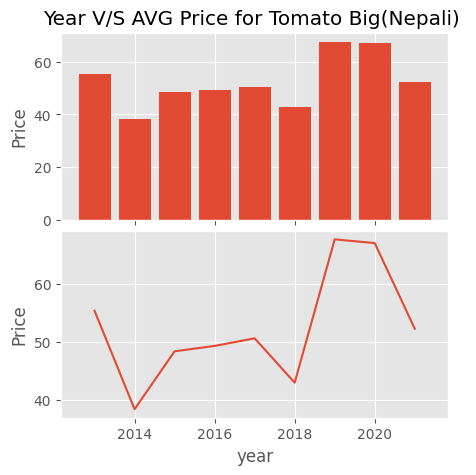

In [20]:
show("Tomato Big(Nepali)") #swap with any commodity to view the trend of price in last decade

### Lets use difflib.get_close_matches for searching 

In [21]:
item = "Onion" #replace with anythin you want to see
get_close_matches(item, commodity , n = 5 , cutoff=0.3 ) #to find possiblities and to correct you

['Onion Green',
 'Mandarin',
 'Mint',
 'Onion Dry (Indian)',
 'Onion Dry (Chinese)']

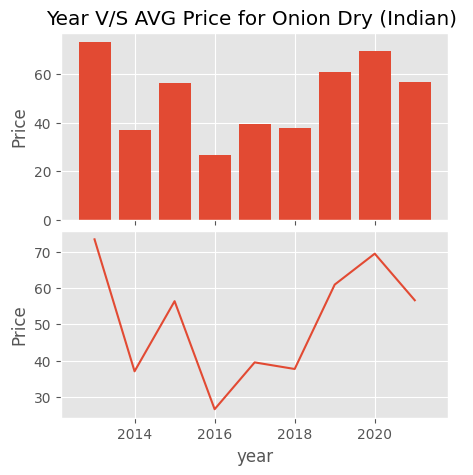

In [22]:
show("Onion Dry (Indian)") #copy and replace from above to see